This notebook shows the required code to generate the figures used in the article. It uses pre-saved data so you can generate them yourself even.

## Power Traces

In [10]:
traces = np.load("firstbyte_guess_traces.npy")

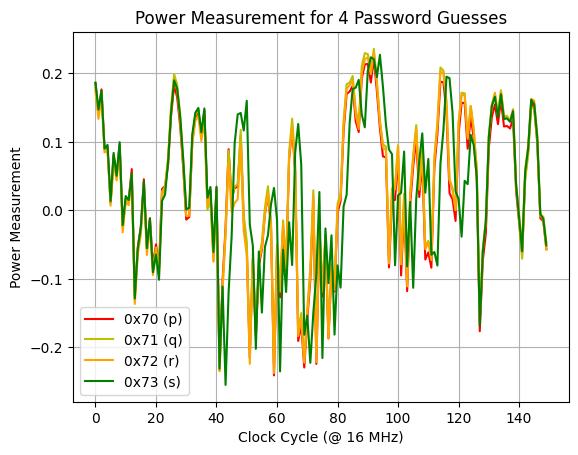

In [11]:
plt.figure()
plt.plot(traces[ord('p')][50:200], 'r')
plt.plot(traces[ord('q')][50:200], 'y')
plt.plot(traces[ord('r')][50:200], 'orange')
plt.plot(traces[ord('s')][50:200], 'g')
plt.xlabel('Clock Cycle (@ 16 MHz)')
plt.ylabel('Power Measurement')
plt.legend(['0x%x (p)'%ord('p'), '0x%x (q)'%ord('q'), '0x%x (r)'%ord('r'), '0x%x (s)'%ord('s')])
plt.title('Power Measurement for 4 Password Guesses')
plt.grid(True)
#plt.savefig("PWGuess.png", format="png", dpi=600)
#plt.savefig("PWGuess.svg", format="svg")
#plt.savefig("PWGuess.eps", format="eps")

In [14]:
diffs = np.load("diffs_password_firstbyte.npy")

In [16]:
vmean = np.mean(diffs)
vstd = np.std(diffs)
np.where (diffs > vstd*3 + vmean)

(array([115], dtype=int64),)

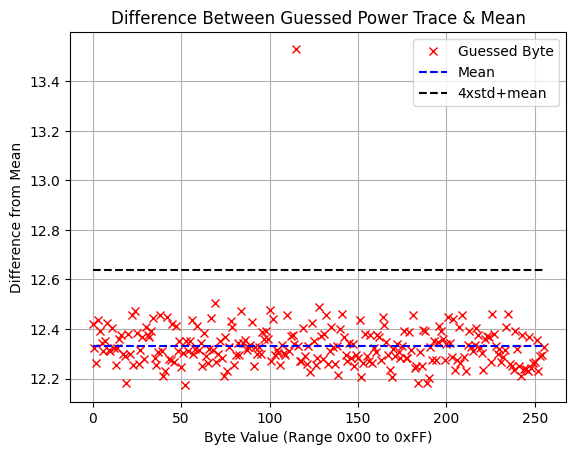

In [17]:
plt.figure()
plt.plot(diffs, 'xr')
plt.plot([0, 255], [vmean, vmean], '--b')
plt.plot([0, 255], [3*vstd+vmean, 3*vstd+vmean], '--k')
plt.legend(["Guessed Byte", "Mean", "4xstd+mean"])
plt.xlabel('Byte Value (Range 0x00 to 0xFF)')
plt.ylabel('Difference from Mean')
plt.title("Difference Between Guessed Power Trace & Mean")
plt.grid(True)
#plt.savefig("GuessDiff.png", format="png", dpi=600)
#plt.savefig("GuessDiff.svg", format="svg")
#plt.savefig("GuessDiff.eps", format="eps")

In [19]:
chr(115)

's'

## Glitch Graph

In [7]:
import numpy as np
import matplotlib.pylab as plt
glitch_data = np.load("glitch_clock.npy", allow_pickle=True)

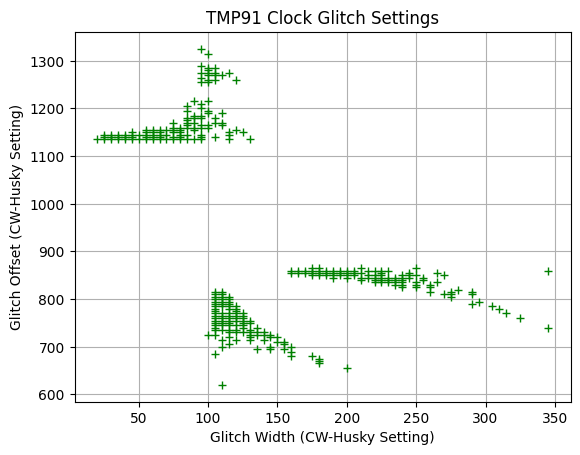

In [9]:
data = glitch_data.item()
plt.figure()

for d in data:
    if data[d]['success'] == 1:
        plt.plot(d[0], d[1], '+g')

plt.xlabel('Glitch Width (CW-Husky Setting)')
plt.ylabel('Glitch Offset (CW-Husky Setting)')
plt.title("TMP91 Clock Glitch Settings")
plt.grid(True)
#plt.savefig("GlitchSuccess.png", format="png", dpi=600)
#plt.savefig("GlitchSuccess.svg", format="svg")
#plt.savefig("GlitchSuccess.eps", format="eps")